<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Hira_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

patient_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)
#add informative names to the features
patient_data.columns=['Age', 'Year of Operation', 'No. of nodes detected', 'Survival']

patient_data.head()

,Age,Year of Operation,No. of nodes detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#appropriate number of observations
patient_data.describe()

In [0]:
#no missing values
patient_data.isnull().sum()

In [0]:
# survivable variable


patient_data.Survival = patient_data.Survival.astype(np.int64)

patient_data.head(10)


In [0]:
patient_data.Survival = patient_data.Survival.astype(np.str)

patient_data.head()

In [0]:
patient_data.dtypes

In [0]:
patient_data["Survival"].value_counts()

Series([], Name: Survival, dtype: int64)

In [0]:
#changing survival status
Survival_status = {'1' : 1, '2' : 0}
patient_data.Survival = patient_data.Survival.map(Survival_status)
patient_data.head(10)

#It didn't work in the first 10 trials. I do not know why! Even After I converted int to object
#then treated 1 as obj to convert to 1 and 0. Hopefully it doesn't give me problems in 
#moving on.


,Age,Year of Operation,No. of nodes detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
pd.crosstab(patient_data['Survival'], patient_data['No. of nodes detected'], normalize='columns')

No. of nodes detected,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
Survival,,,,,,,,,,,,,,,,,,,,,
0,0.139706,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.285714,0.666667,...,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.860294,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.714286,0.333333,...,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


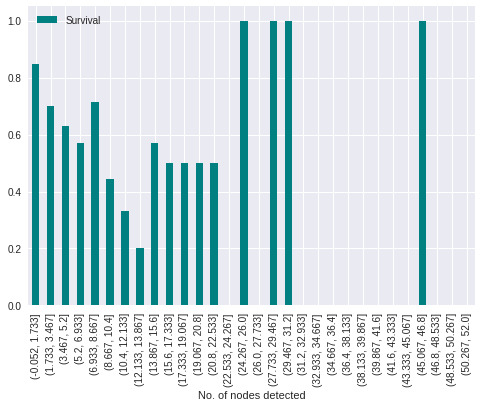

In [0]:
node_bins = pd.cut(patient_data['No. of nodes detected'], 30)

pd.pivot_table(patient_data, values='Survival', index=node_bins).plot.bar(color = 'teal');

I had to  make tables to make sense of the data.
From my understnding, the survival rate for patients with 24-26 no. of nodes, 27-29, and 29-31 no. of nodes detected, was 100%. It might be because there was only one patient with 24-26 nodes and they survived because this table doesn't give us a good picture. frin 31-43 numbers of nodes detected, there was no survivor, either because they didn't have any patient or the patients were just not lucky because then, at 45-46 no. of nodes, there was a survivor again. So, these tables are not exactly good presentation of data.

In [0]:
# TODO

#pd.crosstab()

#pd.pivot_table(user_data, values='purchased', index=time_bins).plot.bar();

print(pd.crosstab(patient_data['Age'], patient_data['Survival']).shape)
#pd.crosstab(patient_data['Age'], patient_data['Survival'])

node_bins = pd.cut(patient_data['No. of nodes detected'], 2)  # 5 equal-sized bins
pd.crosstab(patient_data['No. of nodes detected'], node_bins)


age_bins = pd.cut(patient_data['Age'], 10)
pd.crosstab(age_bins, node_bins)


(49, 2)


No. of nodes detected,"(-0.052, 26.0]","(26.0, 52.0]"
Age,,
"(29.947, 35.3]",15,1
"(35.3, 40.6]",27,0
"(40.6, 45.9]",45,1
"(45.9, 51.2]",53,0
"(51.2, 56.5]",54,1
"(56.5, 61.8]",40,1
"(61.8, 67.1]",40,1
"(67.1, 72.4]",18,0
"(72.4, 77.7]",7,0


I decided to break no. of nodes detected into 2 bins because nodes. had an average of 4 and mode of 1, meaning there was an outlier that increase the average but he mode was still 1. So, between the age of 29-35, 15 people had nodes detected between 26. But that doesn't really tell a lot because when bins = 100, since the mode is 1, it doesn't tell a very different number from 15. 

Survival vs. Year of operation

In [0]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

#kind

In [0]:
sns.pairplot(patient_data, hue='Survival', size=4)
plt.show()


I just wanted to see a pairplot as I practiced for homework. 


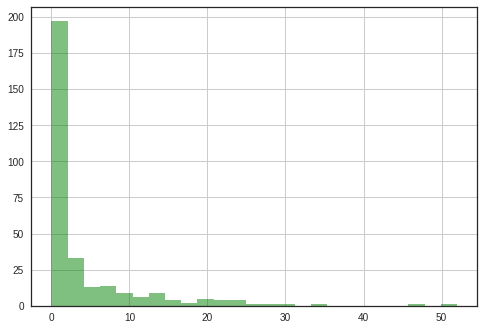

In [0]:

patient_data['No. of nodes detected'].hist(alpha = 0.5, color ='green', bins=25)


Most patients had numbers of nodes detected under 5. As shown from the patient_data.describe(), the mean was 4 and the mode was 1, this graph just illustrates that. 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


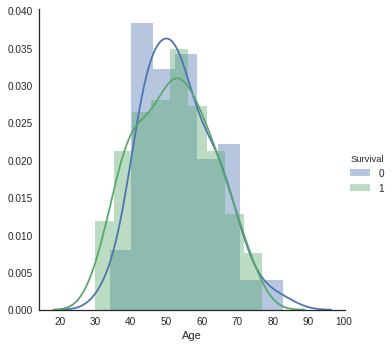

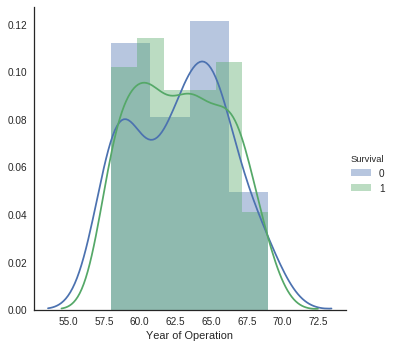

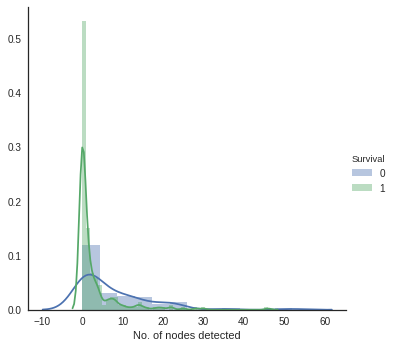

In [0]:
#after practicing for hw yesterday, I think these are the best to demonstrate/make
#sense of data with multiple variables


for idx, feature in enumerate(list(patient_data.columns)[:-1]):
    fig = sns.FacetGrid(patient_data, hue='Survival', size=5)
    fig.map(sns.distplot, feature).add_legend()
    plt.show()

Figure 1:
Shows that people between the ages of 50 and 60 had the highest survival rates. It might be because that was the age group mostly detected with nodes.


Figure 2:
Shows the relationship between the year of operation and survival and it doesn't really indicate anything because the shape is roughly the same for survivors as well as non-survivors.


Figure 3:
the huge bar at 0 is becasue the average number of nodes detected was 4, where the mode was 1, so it is obviously going to show that people survived after 5 years of operation. The interesting thing it does show though, is that with higher number of nodes, people were less likely to survive. The green area under the line graph is smaller than the blue area under the blue line, especially after both lines cross. So, as the number of nodes detected increased, the survival rate fell and more patients were likely to not survive after 5 years of operation. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

We can safely say that none of the features had a strongly positive relationship with survival unless we take into consideration the no. of nodes and hypothesize that the lower the number of survival, the higher the survival rate but that is almost like a negative relationship. Also age might incorrectly seem as having a positive relationship with survival, with higher the age, higher the survival rate. But that is because most of the patients were between the age of 30 and 60 and had , on average, only one node, so their survival rate was higher after 5 years. 


No. of nodes detected has a negative relationship with survival: as the no. of nodes detected increased, the patients were less likely to survive after 5 years of operation, as shown by Figure 3. The blue line is significantly higher than the green line in Figure 3 and that shows the patients were less likely to survive if the number of nodes detected increased. Age could also be negatively related to survival because as the age of the patient increased, regardless of the number of nodes, the survival rate was very low or close to 0 as shown in figure 1.  

Most of patients were of age 40 to 60 and had an average of 1 node detected for cancer. Since the number of nodes detected was low for that age group, they had a higher chance of surviving. But as the age increased, there were only two patients who were dectected with nodes, as shown by the crosstable but none of them survived as the green bar is at 0 in Figure 1 for that age group. So, as the age increased, even if the number of nodes was low, the survival rate declined. 